<a href="https://colab.research.google.com/github/jakubglinka/pyprobml/blob/master/notebooks/book1/08/steepestDescentDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

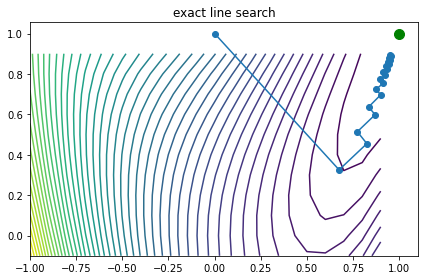

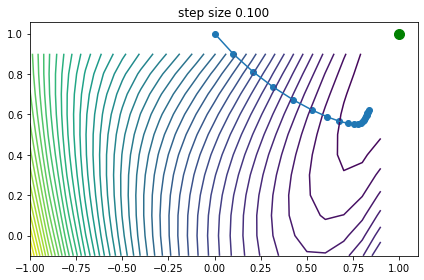

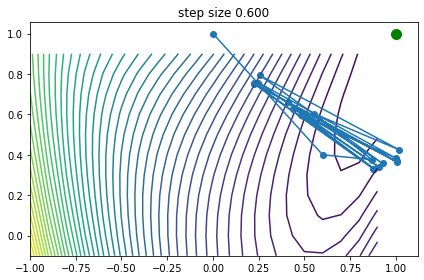

In [5]:
# Author: Meduri Venkata Shivaditya

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, line_search


def aoki_vectorized(x):
    """
    F(x,y) = 0.5 (x^2 - y)^2 + 0.5 (x-1)^2
    """
    f = 0.5 * np.square(np.square(x[:][0]) - x[:][1]) + 0.5 * np.square(x[:][0] - 1)
    return f


def aoki(x):
    """
    F(x,y) = 0.5 (x^2 - y)^2 + 0.5 (x-1)^2
    """
    f = 0.5 * np.square(np.square(x[0]) - x[1]) + 0.5 * np.square(x[0] - 1)
    return f


def aoki_gd(x):
    """
    First-Order derivative of aoki function(Nabia - 1)
    """
    g_x = 2 * np.dot((np.square(x[0]) - x[1]), x[0]) + x[0] - 1
    g_y = -1 * (np.square(x[0]) - x[1])
    return np.array((g_x, g_y))


def aoki_hess(x):
    """
    Second-Order derivative - Hessian Matrix of aoki function(Nabia - 2)
    """
    g_xx = 6 * np.square(x[0]) - 2 * x[1] + 1
    g_xy = -2 * x[0]
    g_yy = 1
    H = np.diag((2, 2))
    H[0][0] = g_xx
    H[0][1] = g_xy
    H[1][0] = g_xy
    H[1][1] = g_yy
    return H


def gradient_descent(x0, f, f_prime, hessian, stepsize=None):
    """
    Steepest-Descent algorithm with option for line search
    """
    x_i, y_i = x0
    all_x_i = list()
    all_y_i = list()
    all_f_i = list()

    for i in range(1, 100):
        all_x_i.append(x_i)
        all_y_i.append(y_i)
        all_f_i.append(f([x_i, y_i]))
        dx_i, dy_i = f_prime(np.asarray([x_i, y_i]))
        if stepsize is None:
            # Compute a step size using a line_search to satisfy the Wolf
            # conditions
            step = line_search(f, f_prime, np.r_[x_i, y_i], -np.r_[dx_i, dy_i], np.r_[dx_i, dy_i], c2=0.05)
            step = step[0]
            if step is None:
                step = 0
        else:
            step = stepsize
        x_i += -step * dx_i
        y_i += -step * dy_i
        if np.abs(all_f_i[-1]) < 1e-16:
            break
    return all_x_i, all_y_i, all_f_i


def main():
    x1 = np.arange(-1, 1, 0.1)
    x2 = np.arange(-0.1, 1, 0.1)
    x = np.meshgrid(x1, x2)
    z = aoki_vectorized(np.array(x))

    step_sizes = [None, 0.1, 0.6]
    for i, step in enumerate(step_sizes):
        plt.contour(x1, x2, z, 50)
        plt.plot(1, 1, "go", markersize=10)
        x0 = np.array((0.0, 1.0))
        if step == None:
            xs, ys, fs = gradient_descent(x0, aoki, aoki_gd, hessian=aoki_hess, stepsize=None)
            ttl = "exact line search"
            fname = "steepestDescentDemo_linesearch"
        else:
            xs, ys, fx = gradient_descent(x0, aoki, aoki_gd, hessian=aoki_hess, stepsize=step)
            ttl = "step size {:0.3f}".format(step)
            fname = "steepestDescentDemo_step{:d}".format(int(step * 10))
        nsteps = 20
        plt.scatter(xs[:nsteps], ys[:nsteps])
        plt.plot(xs[:nsteps], ys[:nsteps])
        plt.title(ttl)
        plt.tight_layout()
        # plt.savefig(f"figures/{fname}.pdf", dpi=300)
        plt.show()


if __name__ == "__main__":
    main()

In [57]:
print(aoki_hess([0.0, 100.0]))
print(aoki_gd([0.0, 100.0]))

[[-199    0]
 [   0    1]]
[ -1. 100.]


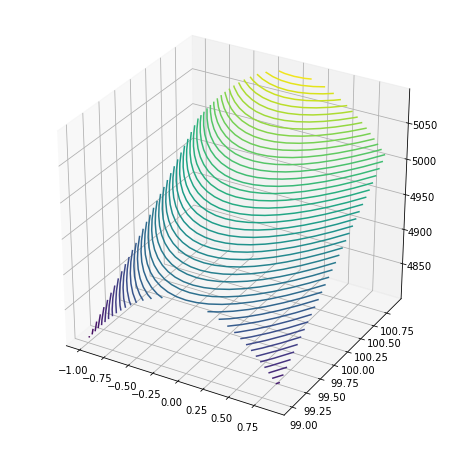

In [55]:
x1 = np.arange(-1, 1, 0.1)
x2 = np.arange(99, 101, 0.1)

x = np.meshgrid(x1, x2)
x
z = aoki_vectorized(np.array(x))
z
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection="3d")

plt.contour(x1, x2, z, 50)

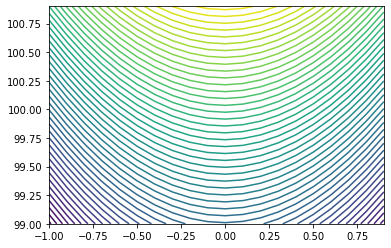

In [59]:
x1 = np.arange(-1, 1, 0.1)
x2 = np.arange(99, 101, 0.1)
x = np.meshgrid(x1, x2)
z = aoki_vectorized(np.array(x))

plt.contour(x1, x2, z, 50)
plt.show()


# step_sizes = [None, 0.1, 0.6]
# for i, step in enumerate(step_sizes):
#     plt.contour(x1, x2, z, 50)
#     plt.plot(1, 1, "go", markersize=10)
#     x0 = np.array((0.0, 101))
#     if step == None:
#         xs, ys, fs = gradient_descent(x0, aoki, aoki_gd, hessian=aoki_hess, stepsize=None)
#         ttl = "exact line search"
#         fname = "steepestDescentDemo_linesearch"
#     else:
#         xs, ys, fx = gradient_descent(x0, aoki, aoki_gd, hessian=aoki_hess, stepsize=step)
#         ttl = "step size {:0.3f}".format(step)
#         fname = "steepestDescentDemo_step{:d}".format(int(step * 10))
#     nsteps = 20
#     plt.scatter(xs[:nsteps], ys[:nsteps])
#     plt.plot(xs[:nsteps], ys[:nsteps])
#     plt.title(ttl)
#     plt.tight_layout()
#     # plt.savefig(f"figures/{fname}.pdf", dpi=300)
#     plt.show()
